In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import gammaln
from scipy.stats import norm
from scipy.optimize import minimize

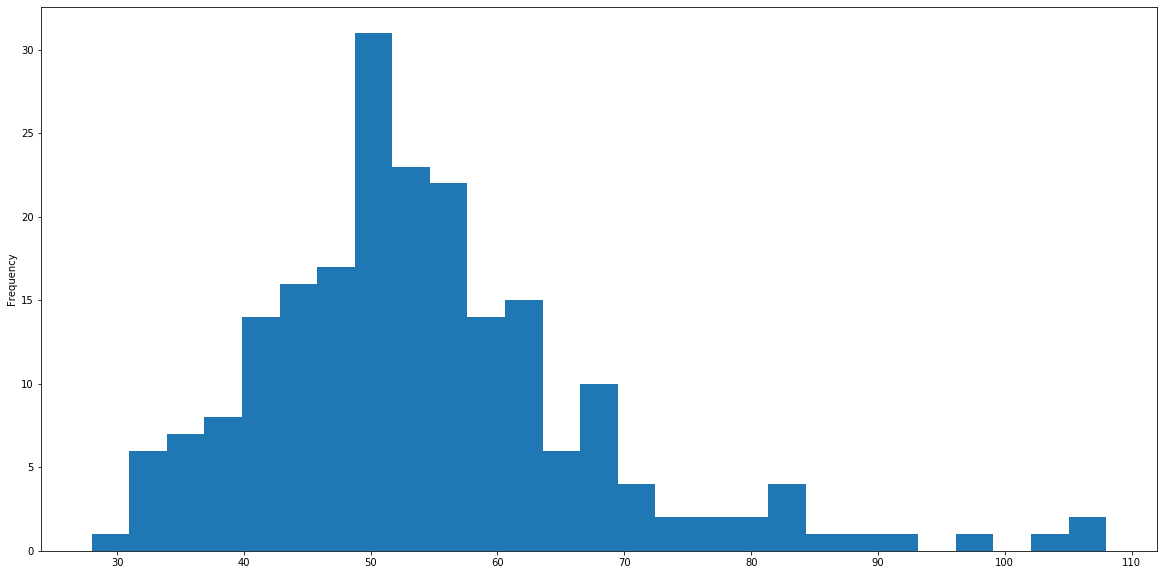

In [86]:
gfr_data = pd.read_csv('https://web.stanford.edu/~hastie/CASI_files/DATA/gfr.txt', sep=" ", header=None)
gfr_data = gfr_data[0]
gfr_data.plot(kind='hist', figsize=(20,10), bins=27)

In [66]:
def neg_shffted_gamma_log_likelihood(x, lamb, sigma, nu):
    '''
    x: observation(s)
    lamb, sigma, nu: gamma pdf parameters (scalar)
    '''
    
    Log_lik = np.sum((nu - 1) * np.log(x - lamb) - (nu * np.log(sigma) + gammaln(nu)) - ((x - lamb) / sigma))
    
    # return the negative as we are maximizing using the minimize function
    return -Log_lik

In [67]:
neg_shffted_gamma_log_lik_for_x = lambda theta: neg_shffted_gamma_log_likelihood(gfr_data, theta[0], theta[1], theta[2])
#                                 ^
#                                 theta is the only varible (aka. make gfr_data fixed)

In [68]:
minimize(neg_shffted_gamma_log_lik_for_x, (21.11172297, 5.38327545, 6.15864502), method='L-BFGS-B')

      fun: 834.4629070849458
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.13686838e-05, 4.54747351e-05, 4.54747351e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 36
      nit: 1
   status: 0
  success: True
        x: array([21.11172285,  5.38327533,  6.1586449 ])

In [69]:
theta = minimize(neg_shffted_gamma_log_lik_for_x, (20, 1, 1), method='L-BFGS-B')['x']
theta

array([21.11085438,  5.38305501,  6.15907382])

In [70]:
'''
theta[0] = 21.11085438 = lamb_hat of MLE
theta[1] = 5.38305501  = sigma_hat of MLE
theta[2] = 6.15907382  = nu_hat of MLE
'''

'\ntheta[0] = 21.11085438 = lamb_hat of MLE\ntheta[1] = 5.38305501  = sigma_hat of MLE\ntheta[2] = 6.15907382  = nu_hat of MLE\n'

In [71]:
# Let's see what a gamma pdf looks like with lamb_hat, sigma_hat and nu_hat
# and compare with the data x
def gamma_pdf(x, lamb, sigma, nu):
    
    # density of 'one x'
    density = np.exp((nu - 1) * np.log(x - lamb) - (nu * np.log(sigma) + gammaln(nu)) - ((x - lamb) / sigma))
    
    return density

In [85]:
gfr_linespace = np.linspace(min(gfr_data), max(gfr_data), 100)

pdf_df = pd.DataFrame({
    'gfr': gfr_linespace,
    'gamma_density': gamma_pdf(gfr_linespace, theta[0], theta[1], theta[2]),
    'normal_density': norm.pdf(gfr_linespace, loc=gfr_data.mean(), scale=gfr_data.std())
})
pdf_df.head()

,gfr,gamma_density,normal_density
0,28.000000,0.001169,0.004654
1,28.808081,0.001783,0.005200
2,29.616162,0.002568,0.005791
3,30.424242,0.003530,0.006426
4,31.232323,0.004667,0.007106


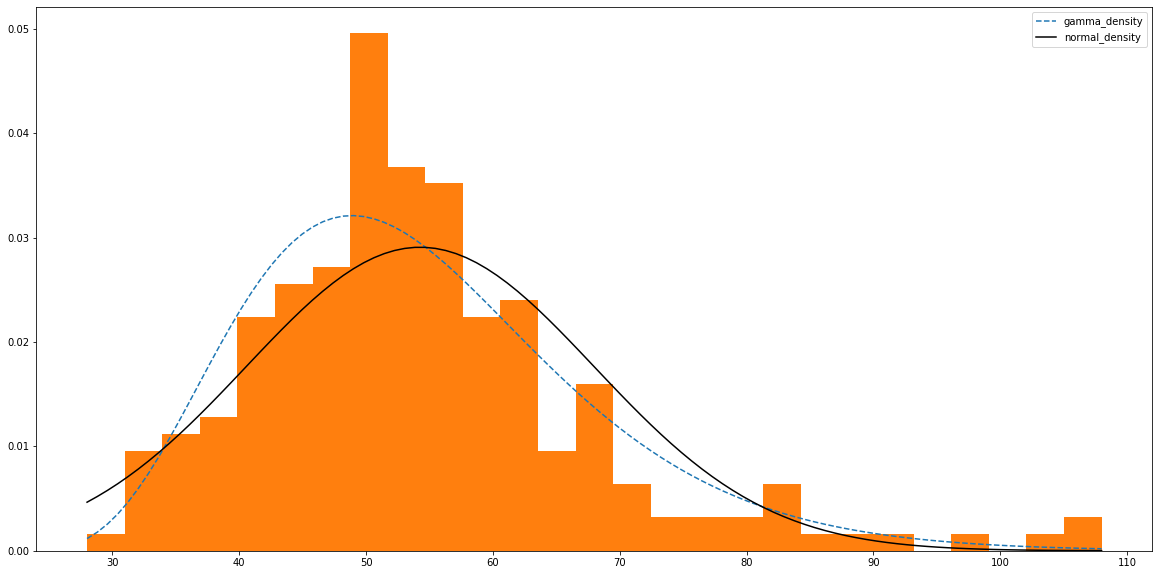

In [84]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)

ax.plot(pdf_df['gfr'], pdf_df['gamma_density'], '--', label=r'gamma_density')
ax.plot(pdf_df['gfr'], pdf_df['normal_density'], '-k', label=r'normal_density')
plt.hist(gfr_data, 27, density=True)

ax.legend()

# best gamma and normal fits that the sample may have.

This are the exact same distributions you would have obtained using Bayesian analysis with a flat prior.

For the Gamma dist, Theta cannot be calculated from an equation. So we need to maximize them ...